In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,6)

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X,y =data.data,data.target

In [5]:
X.shape

(569, 30)

In [7]:
from sklearn.preprocessing import StandardScaler
x_estandarizador = StandardScaler()
X_std = x_estandarizador.fit_transform(X)

In [9]:
x0 = X_std[0]
y0 = y[0]
print(x0,y0)

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461] 0


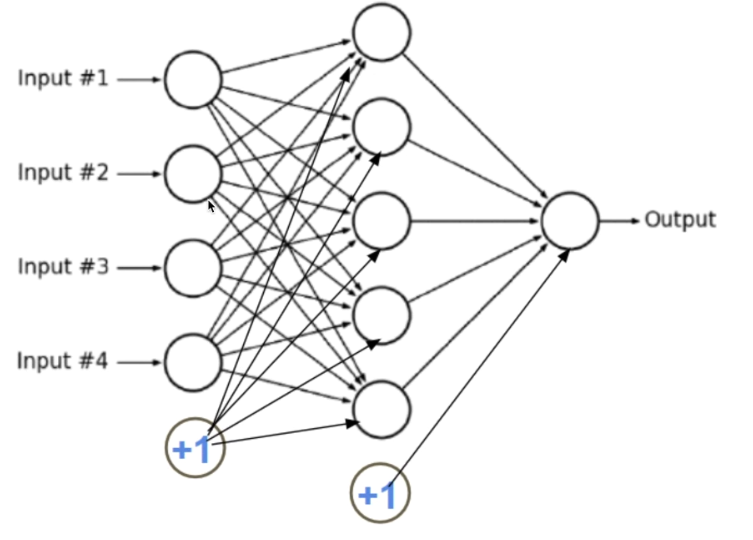

In [11]:
from IPython.display import Image
Image("redneuronal.png")

In [12]:
# dos funciones de activacion
def fn_identidad(x,derivada=False):
    if derivada:
        return np.ones(x.shape)
    return x

In [13]:
def fn_sigmoide(x, derivada=False):
    if derivada:
        return x * (1-x)
    return 1/(1+np.exp(-x))

In [14]:
# calcular el error de una prediccion... para el caso de clasificacion binaria
def error_logloss(y_pred,y):
    v = np.clip(y_pred,1e-15,1 -1e-15)
    if y == 1:
        return np.log(v)
    else:
        return -np.log(1-v)
        

In [15]:
class Capa:
    def __init__(self, n_unidades, fn_activacion, bias=True):
        self.n_unidades = n_unidades
        self.fn_activacion = fn_activacion
        self.dim_output = n_unidades
        self.bias = bias
        self.dimensiones = "no generadas"
        self.w = None
    def __repr__(self):
        return "Capa: {} <=> dimensiones: {} <=> pesos: {} ".format(
        self.nombre, self.dimensiones, self.w)
    
    def add_bias(self,x):
        if not self.bias:
            return x
        x_con_bias = np.append(1,x)
        return x_con_bias_2d.reshape(x_con_bias.shape[0],1)
    
    def generar_pesos(self, dim_anterior):
        if self.bias:
            self.dimensiones = (self.n_unidades, dim_anterior + 1)
        else:
            self.dimensiones = (self.n_unidades, dim_anterior)
        self.w = np.random.random(self.dimensiones)
    
    def activar(self,x):
        x_con_bias_2d = self.add_bias(x)
        return self.fn_activacion(self.w @ x_con_bias_2d)
    
    def calcular_delta(self,producto_capa, output_capa):
        return producto_capa * self.fn_activacion(output_capa, derivada=True)

In [16]:
class CapaInput(Capa):
    nombre = "entrada"
    
    def generar_pesos(self):
        pass
    
    def activar(self,x):
        return x

class CapaOculta(Capa):
    nombre = "oculta"

class CapaSalida(Capa):
    nombre = "salida"

In [ ]:
class RedNeuronal:
    def __init__(self, ratio_aprendizaje, fn_error):
        self.layers = []
        self.ratio_aprendizaje = ratio_aprendizaje
        self.fn_error = fn_error
    
    def add_layer(self, layer):
        if layer.nombre == "entrada":
            layer.generar_pesos()
        else:
            layer.generar_pesos(self.layers[-1].dim_output)
        self.layers.append(layer)
        
    def __repr__(self):
        info = " "
        for layer in self.layers:
            info += "/nCapa: {} unidades: {}".format(layer.nombre,layer.n_unidades)
        return info
    
    def forward(self, x):
        for layer in self.layers:
            layer.input = layer.add_bias(x).T
            x = layer.activar(x)
            layer.output = x
        return x
    
    def calcular_error_prediccion(self,y_pred,y):
        return self.fn_error(y_pred,y)
    
    def backward(self,y_pred, y):
        delta_capa = self.calcular_error_prediccion(y_pred,y)
        for layer in reversed(self.layers):
            if layer.nombre == "entrada":
                continue
            if layer.nombre == "salida":
                producto_capa = delta_capa @ layer.w
            else:
                producto_capa = delta_capa[:,1:] @ layer.w
                delta_capa = layer.calcular_delta(producto_capa,layer.output)
                layer.delta = delta_capa

                
        